# Election Results: Portugal 2019 Data Set

https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019



### Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.
Regardless, it allows for other tasks such as ordinal regression or learn-to-rankProvide a short description of your data set (less than 200 characters).

#### Additional (and updated) information may be found in [Web Link] :
- Raw data sets
- R code to build the final data set
- Basic operations to build predictive modelling tasks using this data set



### Attribute Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition

time (timestamp): Date and time of the data acquisition

territoryName (string): Short name of the location (district or nation-wide)

totalMandates (numeric): MP's elected at the moment

availableMandates (numeric): MP's left to elect at the moment

numParishes (numeric): Total number of parishes in this location

numParishesApproved (numeric): Number of parishes approved in this location

blankVotes (numeric): Number of blank votes

blankVotesPercentage (numeric): Percentage of blank votes

nullVotes (numeric): Number of null votes

nullVotesPercentage (numeric): Percentage of null votes

votersPercentage (numeric): Percentage of voters

subscribedVoters (numeric): Number of subscribed voters in the location

totalVoters (numeric): Percentage of blank votes

pre.blankVotes (numeric): Number of blank votes (previous election)

pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)

pre.nullVotes (numeric): Number of null votes (previous election)

pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)

pre.votersPercentage (numeric): Percentage of voters (previous election)

pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)

pre.totalVoters (numeric): Percentage of blank votes (previous election)

Party (string): Political Party

Mandates (numeric): MP's elected at the moment for the party in a given district

Percentage (numeric): Percentage of votes in a party

validVotesPercentage (numeric): Percentage of valid votes in a party

Votes (numeric): Percentage of party votes

Hondt (numeric): Number of MP's according to the distribution of votes now

FinalMandates (numeric): Target: final number of elected MP's in a district/national-level


#### Importing or calling all necessary models

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## DataSet:
### Loading / Cleaning / Formatting

In [72]:
df=pd.read_csv('ElectionData.csv',parse_dates=[1])
df

TimeElapsed                time        territoryName  totalMandates  \
0                0 2019-10-06 20:10:02  Território Nacional              0   
1                0 2019-10-06 20:10:02  Território Nacional              0   
2                0 2019-10-06 20:10:02  Território Nacional              0   
3                0 2019-10-06 20:10:02  Território Nacional              0   
4                0 2019-10-06 20:10:02  Território Nacional              0   
...            ...                 ...                  ...            ...   
21638          265 2019-10-07 00:35:01                Viseu              8   
21639          265 2019-10-07 00:35:01                Viseu              8   
21640          265 2019-10-07 00:35:01                Viseu              8   
21641          265 2019-10-07 00:35:01                Viseu              8   
21642          265 2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...     ...    ... 

In [73]:
df=pd.DataFrame(data=df)
df

TimeElapsed                time        territoryName  totalMandates  \
0                0 2019-10-06 20:10:02  Território Nacional              0   
1                0 2019-10-06 20:10:02  Território Nacional              0   
2                0 2019-10-06 20:10:02  Território Nacional              0   
3                0 2019-10-06 20:10:02  Território Nacional              0   
4                0 2019-10-06 20:10:02  Território Nacional              0   
...            ...                 ...                  ...            ...   
21638          265 2019-10-07 00:35:01                Viseu              8   
21639          265 2019-10-07 00:35:01                Viseu              8   
21640          265 2019-10-07 00:35:01                Viseu              8   
21641          265 2019-10-07 00:35:01                Viseu              8   
21642          265 2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...     ...    ... 

In [74]:
#First five data rows of the data
df.head()

TimeElapsed                time        territoryName  totalMandates  \
0            0 2019-10-06 20:10:02  Território Nacional              0   
1            0 2019-10-06 20:10:02  Território Nacional              0   
2            0 2019-10-06 20:10:02  Território Nacional              0   
3            0 2019-10-06 20:10:02  Território Nacional              0   
4            0 2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   
1                   2.5       8874  ...                 52.66   
2                   2.5       8874  ...                 52.66   
3                   2.5       8874  ...                 52.66   
4                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   
2                813743           428546     B.E.         0        6.81   
3                813743           428546   CDS-PP         0        4.90   
4                813743           428546  PCP-PEV         0        4.59   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19  
3                  5.14   18923     12              5  
4                  4.83   17757     11             12  

[5 rows x 28 columns]

In [75]:
#Last five data rows of the data
df.tail()

TimeElapsed                time territoryName  totalMandates  \
21638          265 2019-10-07 00:35:01         Viseu              8   
21639          265 2019-10-07 00:35:01         Viseu              8   
21640          265 2019-10-07 00:35:01         Viseu              8   
21641          265 2019-10-07 00:35:01         Viseu              8   
21642          265 2019-10-07 00:35:01         Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters  Party  Mandates  Percentage  \
21638                371931           190712     NC         0        0.19   
21639                371931           190712    PNR         0        0.18   
21640                371931           190712    MPT         0        0.14   
21641                371931           190712    PTP         0        0.13   
21642                371931           190712    JPP         0        0.07   

       validVotesPercentage  Votes  Hondt  FinalMandates  
21638                  0.20    332      0              0  
21639                  0.19    326      0              0  
21640                  0.15    256      0              0  
21641                  0.14    239      0              0  
21642                  0.07    118      0              0  

[5 rows x 28 columns]

In [76]:
#Shape of the data 
df.shape

(21643, 28)

In [77]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

In [78]:
df.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.nullVotesPercentage  \
count         21643.000000      21643.000000  ...             21643.000000   
mean              1.961471         51.983722  ...                 1.777442   
std               0.375250          4.854380  ...                 0.388798   
min               1.340000         35.980000  ...                 1.140000   
25%               1.720000         50.290000  ...                 1.520000   
50%               1.870000         53.130000  ...                 1.690000   
75%               2.230000         54.550000  ...                 1.970000   
max               3.350000         59.870000  ...                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000  

[8 rows x 25 columns]

The description of the above dataset entrails the total count  followed by mean , standard deviation , minimum , maximum , median , 1st and 3rd quartile.

If we consider the total mandates among all the attributes then , total count is 21643, average is 11.54, standard deviation is around 31, min is 0 and maximum total mandates is 226 and median is at 4. For other attributes we could take out such meaningful informations.

In [79]:
#Mean FinalMandates:
df['FinalMandates'].mean()

1.1261377812687705

### Checking Uniqueness

In [80]:
df['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [81]:
df['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [82]:
df['time'].unique()

array(['2019-10-06T20:10:02.000000000', '2019-10-06T20:15:02.000000000',
       '2019-10-06T20:20:02.000000000', '2019-10-06T20:25:02.000000000',
       '2019-10-06T20:30:02.000000000', '2019-10-06T20:35:02.000000000',
       '2019-10-06T20:40:02.000000000', '2019-10-06T20:45:02.000000000',
       '2019-10-06T20:50:01.000000000', '2019-10-06T20:55:01.000000000',
       '2019-10-06T21:00:01.000000000', '2019-10-06T21:05:01.000000000',
       '2019-10-06T21:10:01.000000000', '2019-10-06T21:15:02.000000000',
       '2019-10-06T21:20:02.000000000', '2019-10-06T21:25:02.000000000',
       '2019-10-06T21:30:01.000000000', '2019-10-06T21:35:01.000000000',
       '2019-10-06T21:40:02.000000000', '2019-10-06T21:45:02.000000000',
       '2019-10-06T21:50:01.000000000', '2019-10-06T21:55:01.000000000',
       '2019-10-06T22:00:02.000000000', '2019-10-06T22:05:02.000000000',
       '2019-10-06T22:10:01.000000000', '2019-10-06T22:15:01.000000000',
       '2019-10-06T22:20:02.000000000', '2019-10-06

In [83]:
#dtypes of the dataset:
df.dtypes

TimeElapsed                          int64
time                        datetime64[ns]
territoryName                       object
totalMandates                        int64
availableMandates                    int64
numParishes                          int64
numParishesApproved                  int64
blankVotes                           int64
blankVotesPercentage               float64
nullVotes                            int64
nullVotesPercentage                float64
votersPercentage                   float64
subscribedVoters                     int64
totalVoters                          int64
pre.blankVotes                       int64
pre.blankVotesPercentage           float64
pre.nullVotes                        int64
pre.nullVotesPercentage            float64
pre.votersPercentage               float64
pre.subscribedVoters                 int64
pre.totalVoters                      int64
Party                               object
Mandates                             int64
Percentage 

### Checking Missing Values

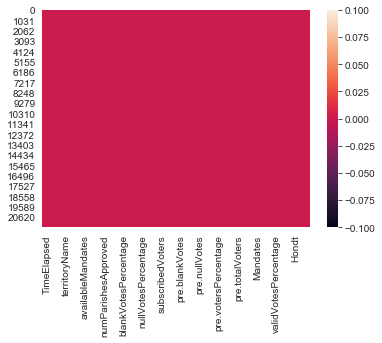

In [84]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is empty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [85]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

### Data Visualization

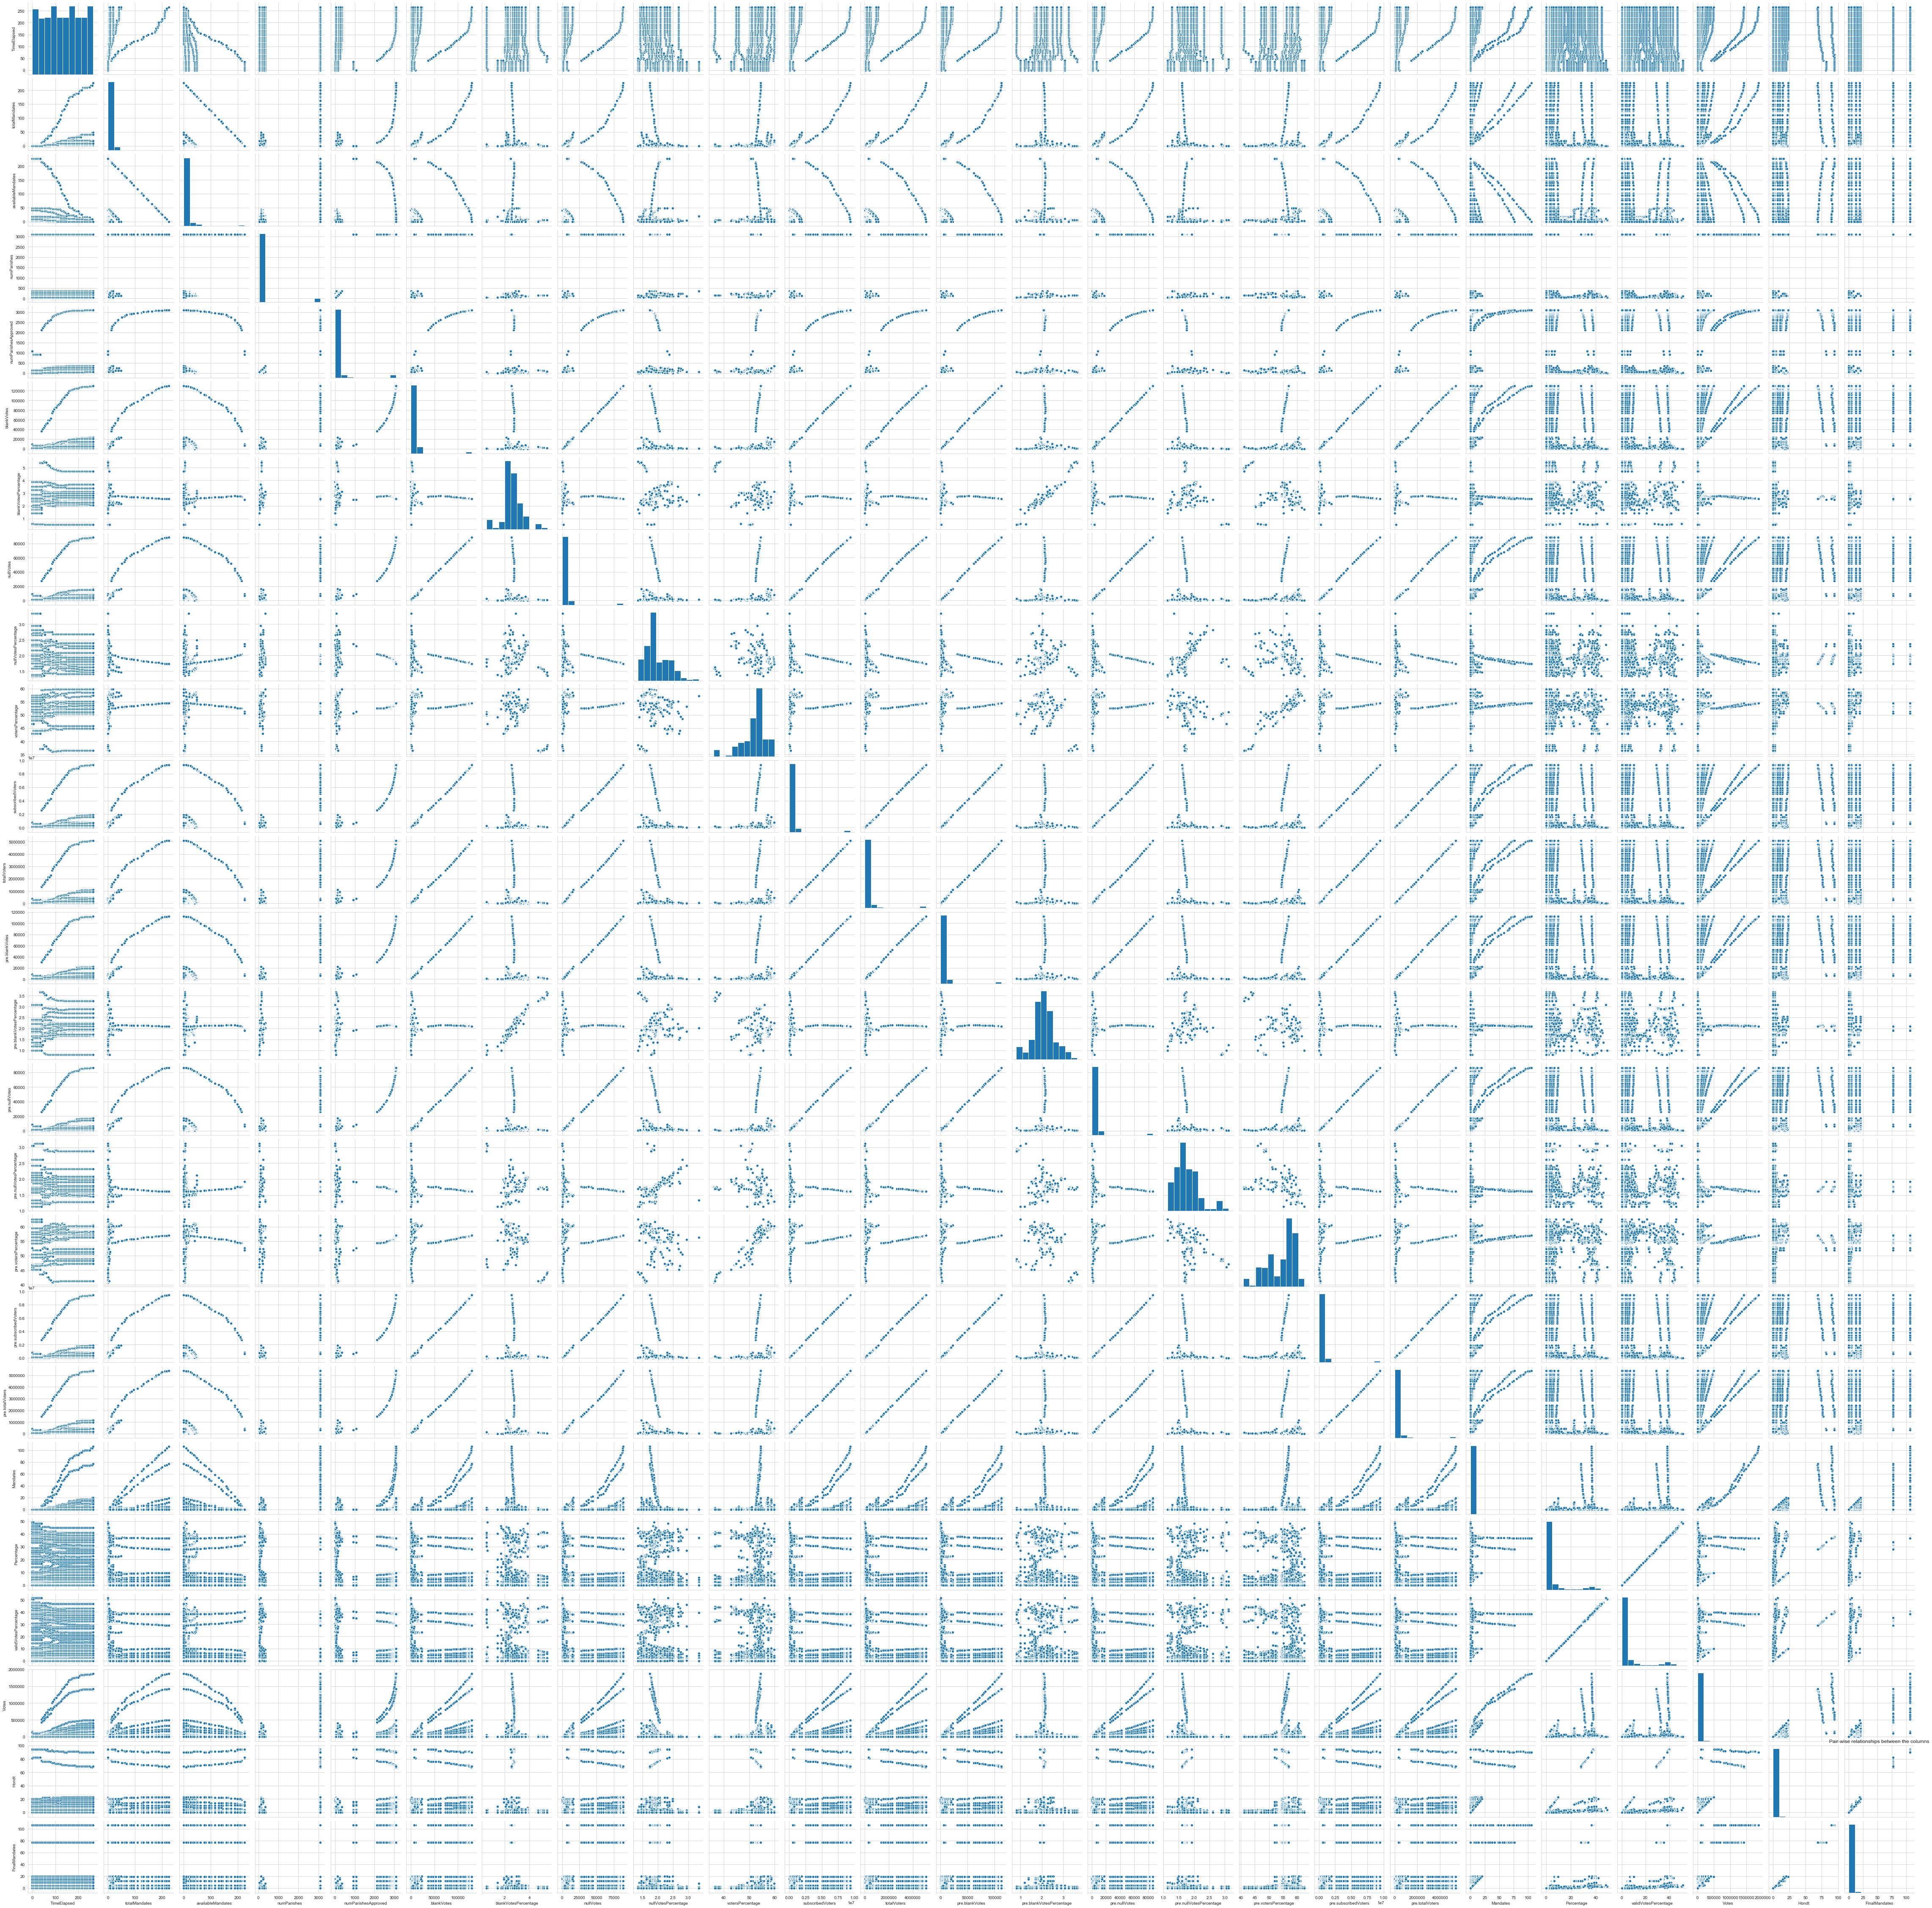

In [86]:
ax = sns.pairplot(df)
plt.title('Pair-wise relationships between the columns')
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration.

But there is one or two fields which is showing negative correlation with the targeted variable (FinalMandates) is the "nullVotesPercentage","pre.nullVotesPercentage" columns which is of no use in the prediction model.

Thus, we will remove these columns.

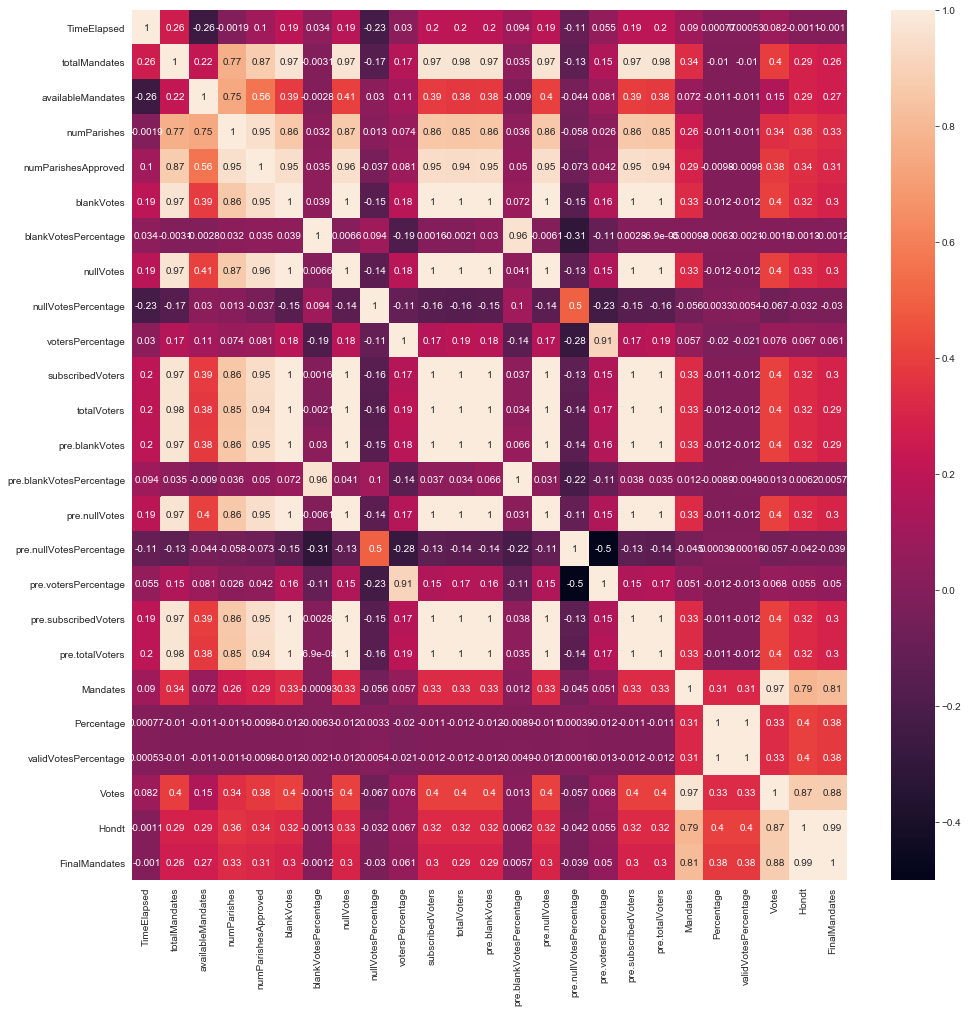

In [87]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

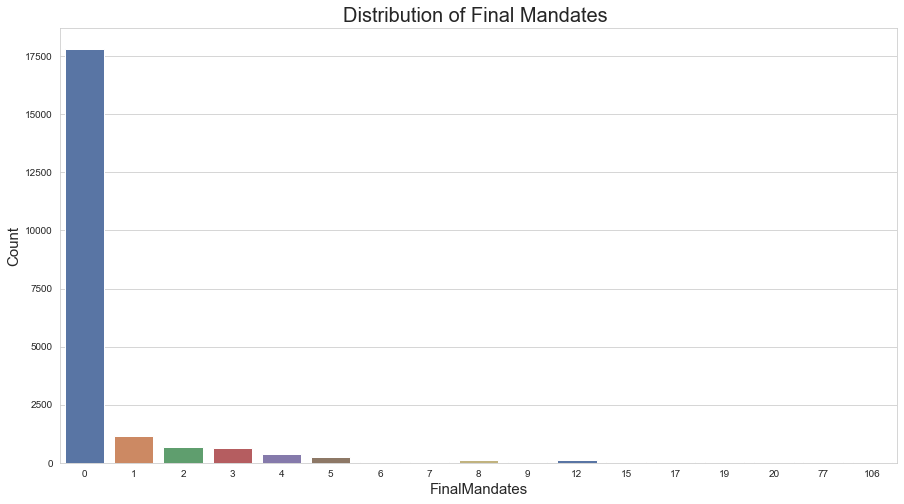

In [88]:
#Data distribution of the Target Variable:

plt.figure(figsize=(15,8))
sns.countplot(x = df['FinalMandates'],palette='deep')
plt.xlabel('FinalMandates', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Final Mandates ",fontsize= 20)
plt.show()

With the above graph it is shown the Distribution of Final Mandates where almost 90 % onf the instances have the final mandates less than 1 where the highest number of final mandates is 1 that is around 1250 or less. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc0bcd6c50>,
      dtype=object)

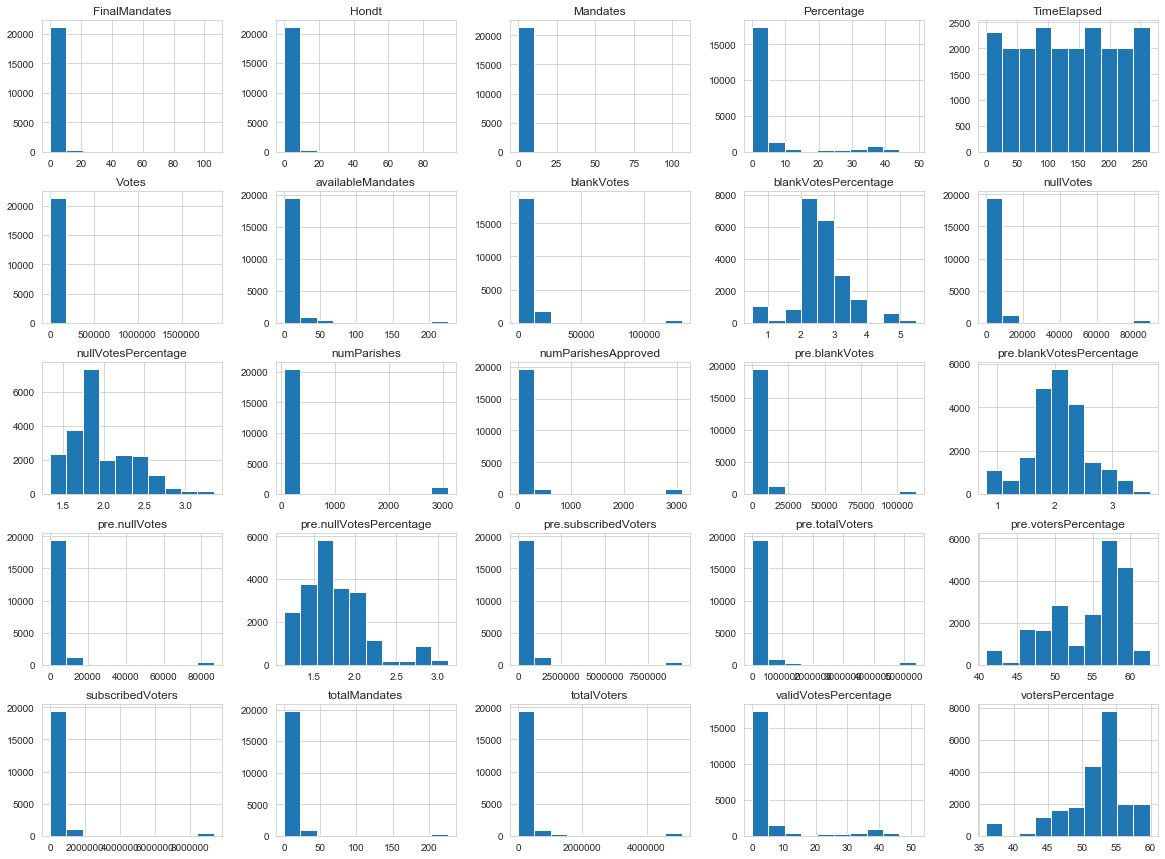

In [89]:
df.hist(figsize=(20,15))

There are some of the outcomes from the following above graphs are as below:
1. Most of the Total mandates are below 25.
2. Around 8000 voters persentage is almost 55.
3. Around 98% of the instances reports null votes below 20000.
4. Around 98% of the total instances have the finalmandates less than 10.

Likewise we could gain the meaningfull information from the other attributes of the datasets.

In [90]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
        'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
        'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
        'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Votes', 'Hondt',
        'FinalMandates'],
       dtype='object'),
 dtype('<M8[ns]'): Index(['time'], dtype='object'),
 dtype('float64'): Index(['blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage',
        'pre.blankVotesPercentage', 'pre.nullVotesPercentage',
        'pre.votersPercentage', 'Percentage', 'validVotesPercentage'],
       dtype='object'),
 dtype('O'): Index(['territoryName', 'Party'], dtype='object')}

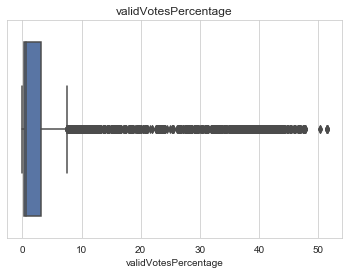

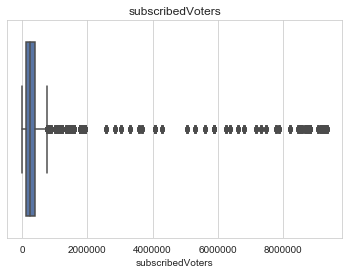

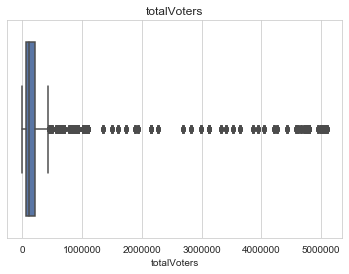

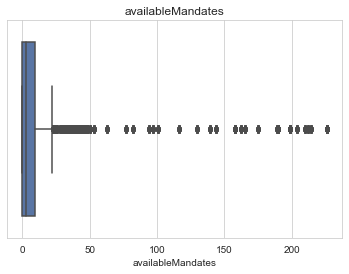

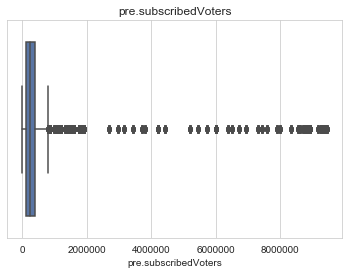

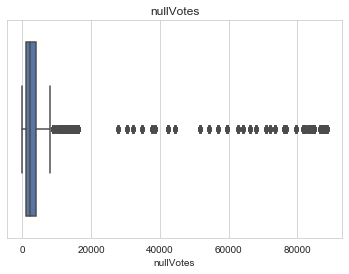

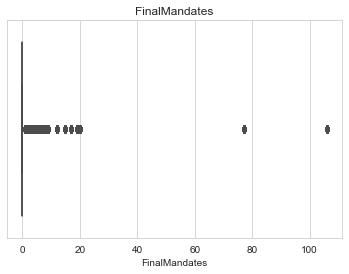

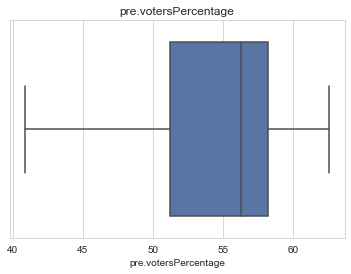

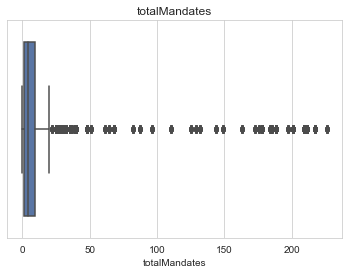

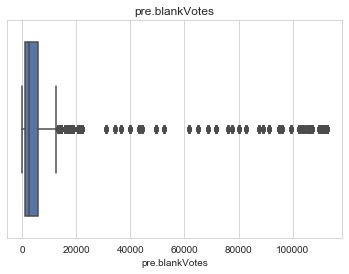

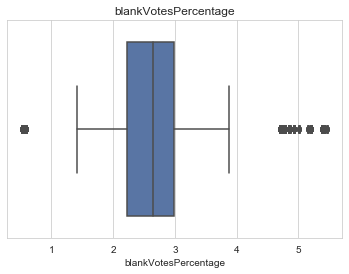

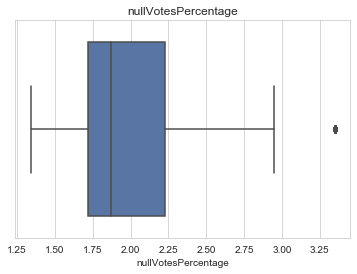

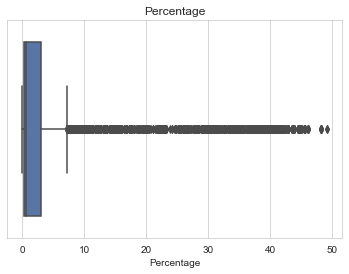

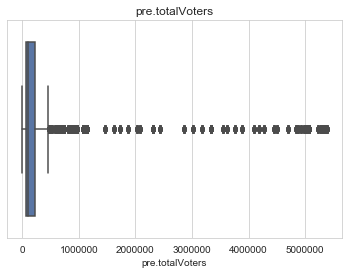

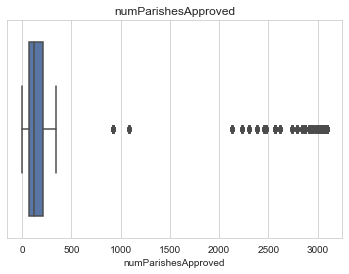

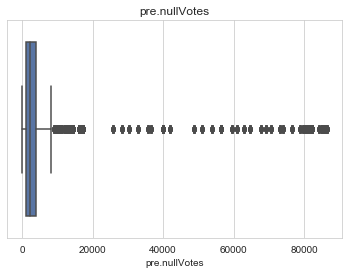

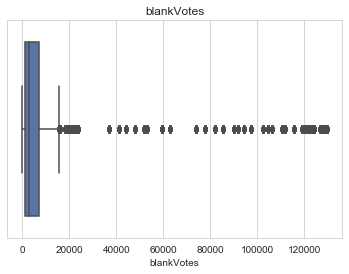

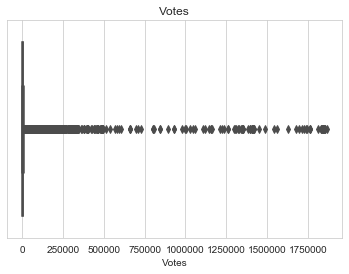

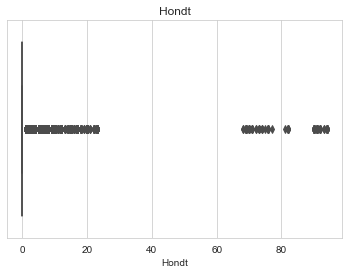

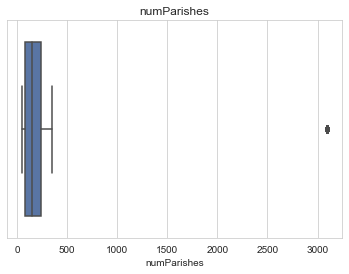

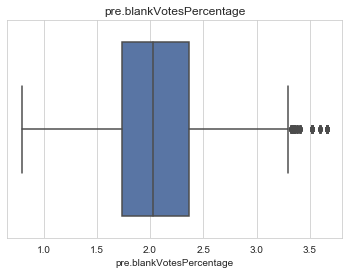

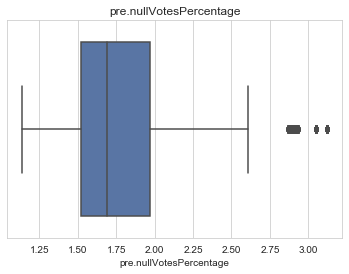

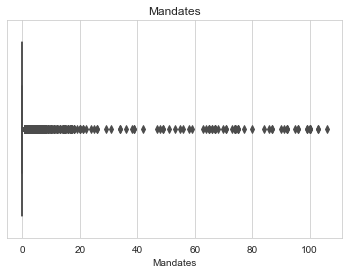

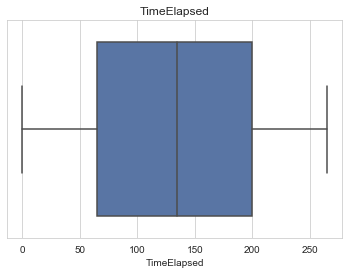

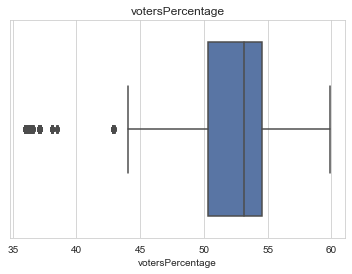

In [91]:
columns={'TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
        'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
        'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
        'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Votes', 'Hondt',
        'FinalMandates', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage',
        'pre.blankVotesPercentage', 'pre.nullVotesPercentage',
        'pre.votersPercentage', 'Percentage', 'validVotesPercentage'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

The plot box situated above are representing the minimum value , maximum value and showing the median value for the variables. In some of the variables such as: available mandates, pre subscribes Voters, null votes, final mandates, total mandates  etc..

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not.

If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

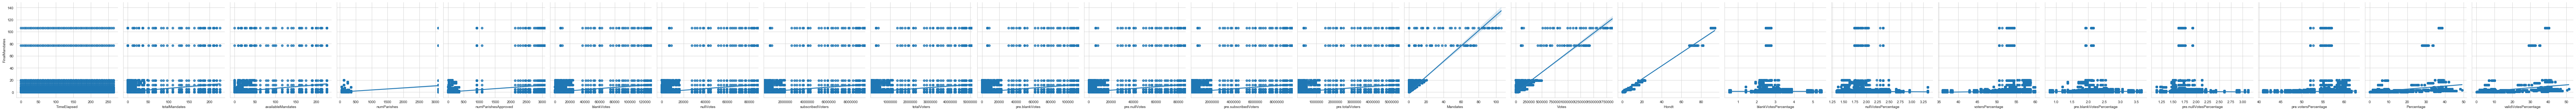

In [92]:
sns.pairplot(df, x_vars=['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
        'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
        'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
        'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Votes', 'Hondt',
        'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage',
        'pre.blankVotesPercentage', 'pre.nullVotesPercentage',
        'pre.votersPercentage', 'Percentage', 'validVotesPercentage'], y_vars='FinalMandates', size=4, aspect=1, kind='reg')

With the above graphs we have been sure which all colums are need to be used for the prediction of the moedel, there are few attributed which are not correlating with the targeted variables i.e. finalmandates thaoes are as follows :"nullVotesPercentage","pre.nullVotesPercentage" 

Text(0.5, 1.0, 'FinalMandates VS territoryName')

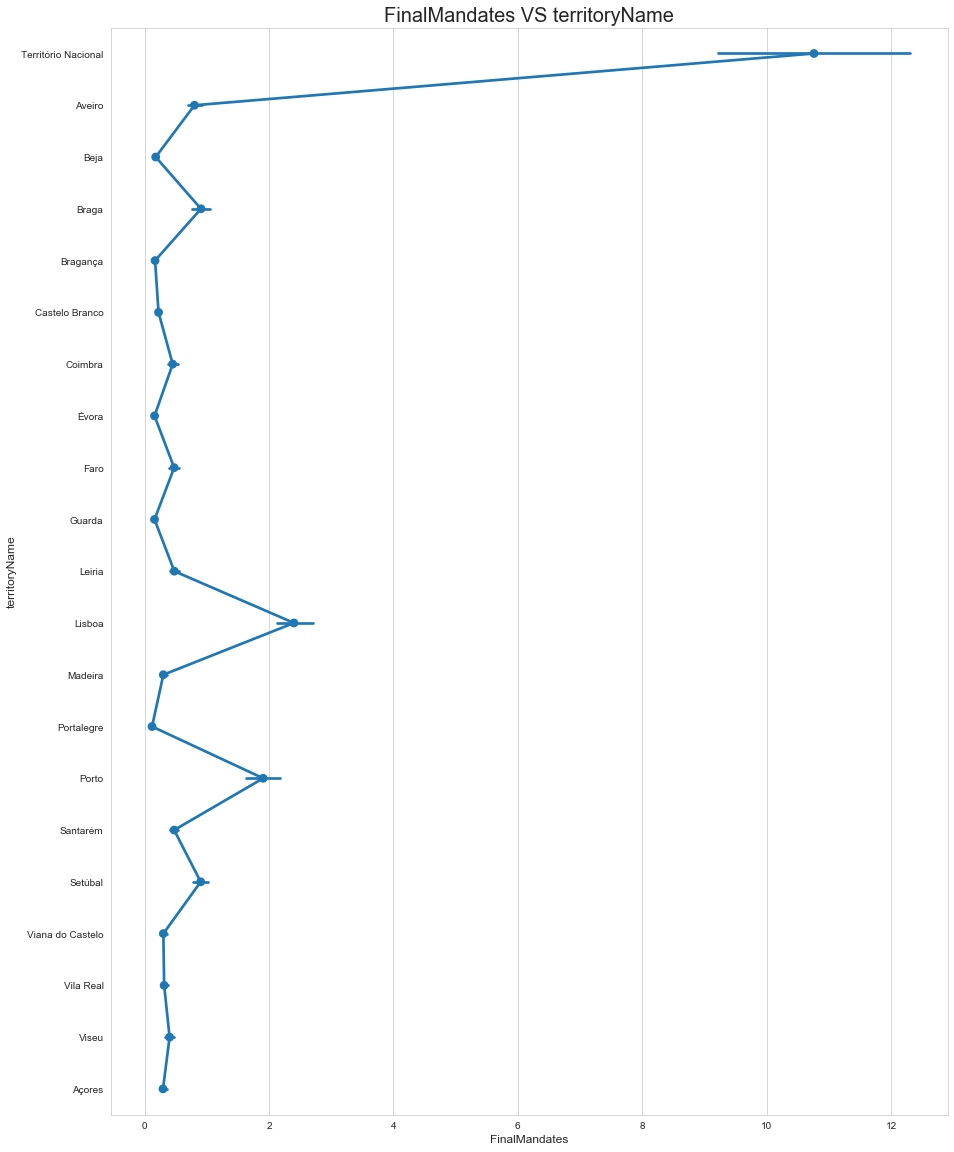

In [93]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='FinalMandates', y='territoryName', data=df,join=True)
plt.xlabel('FinalMandates',{'fontsize' : 'large'})
plt.ylabel('territoryName',{'fontsize':'large'})
plt.title("FinalMandates VS territoryName",{'fontsize':20})

The above graph shows the plotting of targeted attribute with respect to the territiry name they belong to i.e. FinalMandates VS territoryName.

1. It is seen that Territorio National is leading with the final mandates over all.
2. Other territory such as Lisboa and Porto are having final mandate >=2.
3. Territories other than above three are less than 2 final mandates.

Text(0.5, 1.0, 'FinalMandates VS Party')

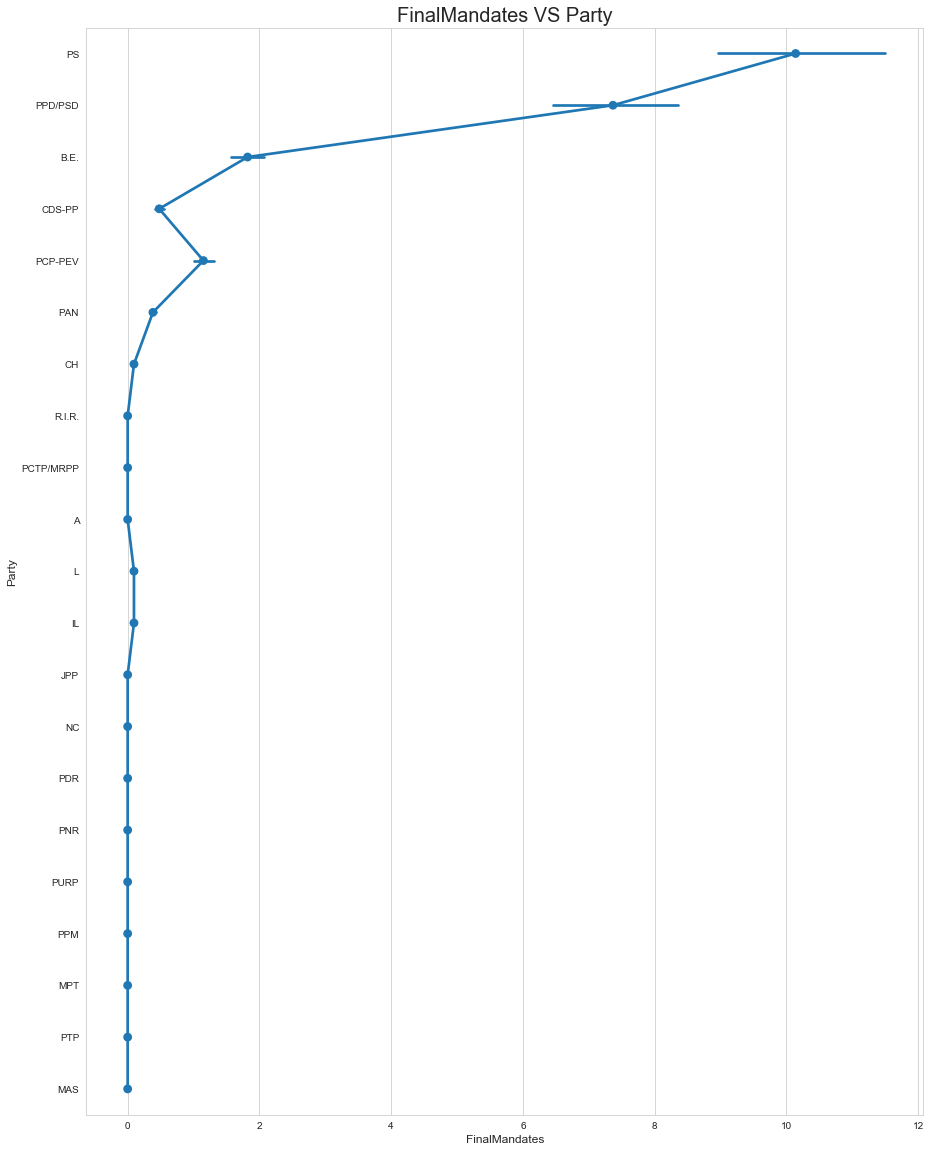

In [94]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='FinalMandates', y='Party', data=df,join=True)
plt.xlabel('FinalMandates',{'fontsize' : 'large'})
plt.ylabel('Party',{'fontsize':'large'})
plt.title("FinalMandates VS Party",{'fontsize':20})

The above graph shows the plotting of targeted attribute with respect to the party they belong to i.e. FinalMandates VS Party.
1. It is shown that the highest final mandates are from  PS party which is around 11.
2. Most of the party have 0 final mandates.
3. PS is followed by PPD/PSD which is around 7 and BE at 2.

In [95]:
# Dropping column as they are not correlatin with the target attribute:
df.drop("time", axis=1,inplace=True)
df.drop("nullVotesPercentage", axis=1,inplace=True)
df.drop("pre.nullVotesPercentage", axis=1,inplace=True)

In [96]:
#After removing columns , shape:
df.shape

(21643, 25)

### LabelEncoder

In [97]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

TimeElapsed  territoryName  totalMandates  availableMandates  numParishes  \
0            0             16              0                226         3092   
1            0             16              0                226         3092   
2            0             16              0                226         3092   
3            0             16              0                226         3092   
4            0             16              0                226         3092   

   numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \
0                 1081        9652                   2.5       8874   
1                 1081        9652                   2.5       8874   
2                 1081        9652                   2.5       8874   
3                 1081        9652                   2.5       8874   
4                 1081        9652                   2.5       8874   

   votersPercentage  ...  pre.votersPercentage  pre.subscribedVoters  \
0             51.36  ...                 52.66                813743   
1             51.36  ...                 52.66                813743   
2             51.36  ...                 52.66                813743   
3             51.36  ...                 52.66                813743   
4             51.36  ...                 52.66                813743   

   pre.totalVoters  Party  Mandates  Percentage  validVotesPercentage   Votes  \
0           428546     17         0       38.29                 40.22  147993   
1           428546     15         0       33.28                 34.95  128624   
2           428546      1         0        6.81                  7.15   26307   
3           428546      2         0        4.90                  5.14   18923   
4           428546     11         0        4.59                  4.83   17757   

   Hondt  FinalMandates  
0     94            106  
1     81             77  
2     16             19  
3     12              5  
4     11             12  

[5 rows x 25 columns]

### Removing Outliers:

In [98]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(21643, 25)


In [99]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(18667, 25)


With the above treatment we have successfully removed various rows from our data through which our final shape is (18667,25) .

### Skewness

In [100]:
df1.skew()

TimeElapsed                -0.003475
territoryName               0.044529
totalMandates               2.558668
availableMandates           2.551333
numParishes                 0.601403
numParishesApproved         0.631827
blankVotes                  1.817136
blankVotesPercentage       -0.908021
nullVotes                   2.116694
votersPercentage           -0.391016
subscribedVoters            2.419502
totalVoters                 2.484548
pre.blankVotes              2.049915
pre.blankVotesPercentage   -0.398159
pre.nullVotes               2.346495
pre.votersPercentage       -0.508686
pre.subscribedVoters        2.381653
pre.totalVoters             2.483034
Party                       0.012255
Mandates                    7.244918
Percentage                  3.402458
validVotesPercentage        3.412140
Votes                       7.374328
Hondt                       7.073470
FinalMandates               6.797110
dtype: float64

In [101]:
#Treatment for the skewed data:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [102]:
df1.skew()

TimeElapsed                -0.003475
territoryName               0.044529
totalMandates               0.043587
availableMandates           0.465878
numParishes                -0.124700
numParishesApproved        -1.071642
blankVotes                 -0.714200
blankVotesPercentage       -0.908021
nullVotes                  -0.875177
votersPercentage           -0.391016
subscribedVoters           -0.750436
totalVoters                -0.637885
pre.blankVotes             -0.671179
pre.blankVotesPercentage   -0.398159
pre.nullVotes              -0.883779
pre.votersPercentage       -0.508686
pre.subscribedVoters       -0.782032
pre.totalVoters            -0.671283
Party                       0.012255
Mandates                    4.525496
Percentage                  1.577455
validVotesPercentage        1.561854
Votes                       0.249525
Hondt                       3.515366
FinalMandates               3.389453
dtype: float64

### Assigning X AND Y Variables:

In [103]:
x=df1.iloc[:,0:24]
x.shape
x

TimeElapsed  territoryName  totalMandates  availableMandates  \
22               0              0       0.000000           2.833213   
23               0              0       0.000000           2.833213   
24               0              0       0.000000           2.833213   
25               0              0       0.000000           2.833213   
26               0              0       0.000000           2.833213   
...            ...            ...            ...                ...   
21638          265             19       2.197225           0.000000   
21639          265             19       2.197225           0.000000   
21640          265             19       2.197225           0.000000   
21641          265             19       2.197225           0.000000   
21642          265             19       2.197225           0.000000   

       numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
22        4.997212             2.564949    5.231109                  2.92   
23        4.997212             2.564949    5.231109                  2.92   
24        4.997212             2.564949    5.231109                  2.92   
25        4.997212             2.564949    5.231109                  2.92   
26        4.997212             2.564949    5.231109                  2.92   
...            ...                  ...         ...                   ...   
21638     5.627621             5.627621    8.516393                  2.81   
21639     5.627621             5.627621    8.516393                  2.81   
21640     5.627621             5.627621    8.516393                  2.81   
21641     5.627621             5.627621    8.516393                  2.81   
21642     5.627621             5.627621    8.516393                  2.81   

       nullVotes  votersPercentage  ...  pre.nullVotes  pre.votersPercentage  \
22      4.624973             53.30  ...       4.718499                 54.56   
23      4.624973             53.30  ...       4.718499                 54.56   
24      4.624973             53.30  ...       4.718499                 54.56   
25      4.624973             53.30  ...       4.718499                 54.56   
26      4.624973             53.30  ...       4.718499                 54.56   
...          ...               ...  ...            ...                   ...   
21638   8.216358             51.04  ...       8.197814                 51.28   
21639   8.216358             51.04  ...       8.197814                 51.28   
21640   8.216358             51.04  ...       8.197814                 51.28   
21641   8.216358             51.04  ...       8.197814                 51.28   
21642   8.216358             51.04  ...       8.197814                 51.28   

       pre.subscribedVoters  pre.totalVoters  Party  Mandates  Percentage  \
22                 9.434443         8.828641     17       0.0    3.564732   
23                 9.434443         8.828641      1       0.0    2.136531   
24                 9.434443         8.828641      2       0.0    1.965713   
25                 9.434443         8.828641     11       0.0    1.220830   
26                 9.434443         8.828641     10       0.0    1.111858   
...                     ...              ...    ...       ...         ...   
21638             12.826466        12.158525      9       0.0    0.173953   
21639             12.826466        12.158525     14       0.0    0.165514   
21640             12.826466        12.158525      8       0.0    0.131028   
21641             12.826466        12.158525     18       0.0    0.122218   
21642             12.826466        12.158525      5       0.0    0.067659   

       validVotesPercentage     Votes     Hondt  
22                 3.609566  7.690743  2.079442  
23                 2.177022  6.167516  0.693147  
24                 2.005526  5.971262  0.693147  
25                 1.252763  5.030438  0.000000  
26                 1.144223  4.875197  0.000000  
...                     ...       ...      

In [104]:
y=df1.iloc[:,-1]
y.shape
y

22       2.079442
23       1.098612
24       0.693147
25       0.000000
26       0.000000
           ...   
21638    0.000000
21639    0.000000
21640    0.000000
21641    0.000000
21642    0.000000
Name: FinalMandates, Length: 18667, dtype: float64

### Standard Scaler:
To bring all the values at the same scale

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

0         1        2         3         4         5         6   \
0 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
1 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
2 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
3 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
4 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
5 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
6 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
7 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
8 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   
9 -1.706948 -1.737501 -1.41523  1.341439  0.167642 -2.304598 -1.872125   

         7         8         9   ...       14       15        16        17  \
0  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
1  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
2  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
3  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
4  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
5  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
6  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
7  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
8  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   
9  0.546588 -2.461977  0.181931  ... -2.39719 -0.11591 -2.319396 -2.293165   

         18        19        20        21        22        23  
0  1.178840 -0.246773  3.093171  3.078568  0.537015  4.542882  
1 -1.434396 -0.246773  1.481890  1.484328 -0.233525  1.301383  
2 -1.271069 -0.246773  1.289175  1.293475 -0.332802  1.301383  
3  0.198877 -0.246773  0.448807  0.455745 -0.808727 -0.319366  
4  0.035549 -0.246773  0.325866  0.334953 -0.887257 -0.319366  
5  1.668822 -0.246773  0.158123  0.162812 -1.004013 -0.319366  
6  0.362204 -0.246773 -0.412458 -0.408433 -1.513315 -0.319366  
7 -1.107742 -0.246773 -0.419621 -0.422344 -1.526806 -0.319366  
8 -0.944414 -0.246773 -0.434085 -0.429366 -1.540666 -0.319366  
9 -1.597724 -0.246773 -0.557002 -0.556050 -1.705284 -0.319366  

[10 rows x 24 columns]

## MODEL SELECTION
Using different types of model in oder to acquire optimum solution:

In [110]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

### Linear Regression

In [111]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.982627615861117
r2_score corresponding to random state:  43 is:  0.9798975291154864
r2_score corresponding to random state:  44 is:  0.9747975429686467
r2_score corresponding to random state:  45 is:  0.9727248578123218
r2_score corresponding to random state:  46 is:  0.9763535946690275
r2_score corresponding to random state:  47 is:  0.974813956363946
r2_score corresponding to random state:  48 is:  0.975576654077899
r2_score corresponding to random state:  49 is:  0.9792313129697157
r2_score corresponding to random state:  50 is:  0.9832449025155294
r2_score corresponding to random state:  51 is:  0.9772511720140734
r2_score corresponding to random state:  52 is:  0.9787568800547175
r2_score corresponding to random state:  53 is:  0.9802339670324204
r2_score corresponding to random state:  54 is:  0.9768611872437063
r2_score corresponding to random state:  55 is:  0.9812534571949987
r2_score corresponding to random state:  56 is:  0.

In [127]:
pred_lreg=lreg.predict(x_test)

In [128]:
from math import sqrt
("Test Results for knn  Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_lreg)))
print("R-squared: ", r2_score(y_test,pred_lreg))

--------------------------------------------------
Root mean squared error:  0.06161685271331704
R-squared:  0.9800478632982174


### KNeighborsRegressor

In [114]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 1}

In [115]:
knn= KNeighborsRegressor(n_neighbors=1)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.9990210711865295
r2_score corresponding to random state:  43 is:  0.99975079410615
r2_score corresponding to random state:  44 is:  0.9995247616246773
r2_score corresponding to random state:  45 is:  0.9994797242142893
r2_score corresponding to random state:  46 is:  0.9992057026168323
r2_score corresponding to random state:  47 is:  0.9990356968737647
r2_score corresponding to random state:  48 is:  0.9986316961725658
r2_score corresponding to random state:  49 is:  0.9989501225263072
r2_score corresponding to random state:  50 is:  0.9992239749879761
r2_score corresponding to random state:  51 is:  0.9994917262319005
r2_score corresponding to random state:  52 is:  0.9992275844791879
r2_score corresponding to random state:  53 is:  0.9997073424665961
r2_score corresponding to random state:  54 is:  0.9991099604984283
r2_score corresponding to random state:  55 is:  0.9992726008238619
r2_score corresponding to random state:  56 is:  0

In [125]:
pred_knn=knn.predict(x_test)

In [126]:
from math import sqrt
("Test Results for knn  Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_knn)))
print("R-squared: ", r2_score(y_test,pred_knn))

--------------------------------------------------
Root mean squared error:  0.006985956275667703
R-squared:  0.999743526726527


### Lasso

In [118]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [119]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.9823170123544016
r2_score corresponding to random state:  43 is:  0.979601290875529
r2_score corresponding to random state:  44 is:  0.9743219644197741
r2_score corresponding to random state:  45 is:  0.9718526315181262
r2_score corresponding to random state:  46 is:  0.975870657983516
r2_score corresponding to random state:  47 is:  0.9741728537709723
r2_score corresponding to random state:  48 is:  0.9748479074174595
r2_score corresponding to random state:  49 is:  0.978738794921186
r2_score corresponding to random state:  50 is:  0.9833125475079565
r2_score corresponding to random state:  51 is:  0.976800983984927
r2_score corresponding to random state:  52 is:  0.9786830919781675
r2_score corresponding to random state:  53 is:  0.9796197565759945
r2_score corresponding to random state:  54 is:  0.9762323491834907
r2_score corresponding to random state:  55 is:  0.9807772567839674
r2_score corresponding to random state:  56 is:  0.9

In [120]:
pred_lasso=lasso.predict(x_test)

In [122]:
from math import sqrt
("Test Results for Lasso Regression Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_lasso)))
print("R-squared: ", r2_score(y_test,pred_lasso))

--------------------------------------------------
Root mean squared error:  0.06222210760007369
R-squared:  0.9796539632894156


In [123]:
#Errors:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.01668448063434234
Mean Squared error :  0.003871590674195148
RMSE is :  0.06222210760007369


In [124]:
from math import log
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 50}

In [129]:
rr=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=2,n_estimators=50)
rr.fit(x_train, y_train)
rr.score(x_train,y_train)

0.9999032603682433

In [130]:
pred=rr.predict(x_test)

In [131]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.01770404889390996
R-squared:  0.9983528407505139


### DecisionTreeRegressor

In [132]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [133]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 14}

In [134]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [135]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  6.514735997768374e-16
R-squared:  1.0


In [136]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.02569239862370736
R-squared:  0.9965310368069088


### GradientBoostingRegressor

In [146]:
gbr= GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=500,subsample=0.9)
gbr.fit(x_train, y_train)
gbr.score(x_train,y_train)

0.9965326232901005

In [147]:
pred_gbr=gbr.predict(x_test)

In [148]:
print("Test Results for GradientBoostingRegressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_gbr)))
print("R-squared: ", r2_score(y_test,pred_gbr))

Test Results for GradientBoostingRegressor Model:
--------------------------------------------------
Root mean squared error:  0.02802573366173061
R-squared:  0.9956455731846201


### Cross_val_score

In [141]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for GBR ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for GBR ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.9749619509780365
Standard Deviation r2 score for Linear Regression:  0.032980489607290345


Mean r2 score for knn:  0.9628541521222787
Standard Deviation r2 score for knn:  0.06656167737625689


Mean r2 score for R_forest Regressor  0.9759024761759172
Standard Deviation r2 score for R_forst Regressor  0.045276635233395514


Mean r2 score for lasso  0.9770555122355382
Standard Deviation r2 score for lasso  0.029427268806075622


Mean r2 score for GBR  0.9742460941549951
Standard Deviation r2 score for GBR  0.03687444384450258


Mean r2 score for DTC  0.9725819755706908
Standard Deviation r2 score for DTC  0.04682562269965401


## Choosing A Model

In above all the models I am going to choose KNeighborsRegressor as the best and final model for the production or prediction of the FinalMandates in the election result of the Portugal2019 dataset.

I am going to choose this model as it is predicting the accuracy score of 100.00% where as where the test result also shows almost 99.97% which is grater than any other model which have been tested above, there are few models such as random forest regressor , gbr and dtc where the training accuracy score is 99% or 100% and above but the test result is relatively less than KNeighborsRegressor.

Hence I am choosing:

#### KNeighborsRegressor

## Saving the Model:

In [149]:
from sklearn.externals import joblib

In [150]:
joblib.dump(knn,'Project_19_Election_Result_Analysis.obj')

['Project_19_Election_Result_Analysis.obj']

In [151]:
#loading back the model:
model=joblib.load('Project_19_Election_Result_Analysis.obj')

In [152]:
#Pridicting x_test KNeighborsRegressor= knn
knn.predict(x_test)

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.69314718])